# **WebApp Deploying with Machine Learning model using tensorflow.js**

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D,Conv2D
from keras.models import Sequential, load_model

Loading the dataset into training and test variable

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Viewing the shape of the train  and test data

In [3]:
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("X_test:", x_test.shape)
print("Y_test:", y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


## About dataset:
> MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits.


>training data: 60000 samples

>test data: 10000 samples

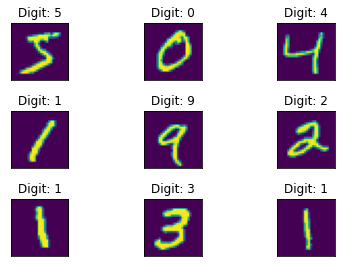

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i])
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

## Data Preprocessing:
> 1) Normalizing the data

> 2) Encode the categories using one-hot encoding

In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [6]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


**one-hot encodin from np_utils of keras**

In [7]:
num_class = 10
print("Shape of y_train before encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print("Shape of y_train after encoding: ", y_train.shape)

Shape of y_train before encoding:  (60000,)
Shape of y_train after encoding:  (60000, 10)


### **Building the network**

The sequential model has two hidden 512 node layers and another densely connected layer for the 10 different output classes

In [8]:
x_train_deep_model = x_train.reshape((60000, 28, 28, 1)).astype('float32')
x_test_deep_model = x_test.reshape((10000, 28, 28, 1)).astype('float32')
deep_model = Sequential()
deep_model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
deep_model.add(MaxPooling2D())
deep_model.add(Conv2D(15, (3, 3), activation='relu'))
deep_model.add(MaxPooling2D())
deep_model.add(Dropout(0.2))
deep_model.add(Flatten())
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(50, activation='relu'))
deep_model.add(Dense(num_class, activation='softmax'))


### Compiling and training the model

In [9]:
deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
deep_model.fit(x_train_deep_model, y_train, validation_data=(x_test_deep_model, y_test), epochs=30, batch_size=200, verbose=2)

Epoch 1/30
300/300 - 18s - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0259 - val_accuracy: 0.9913 - 18s/epoch - 59ms/step
Epoch 2/30
300/300 - 20s - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0276 - val_accuracy: 0.9915 - 20s/epoch - 65ms/step
Epoch 3/30
300/300 - 14s - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0247 - val_accuracy: 0.9916 - 14s/epoch - 47ms/step
Epoch 4/30
300/300 - 14s - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0226 - val_accuracy: 0.9925 - 14s/epoch - 46ms/step
Epoch 5/30
300/300 - 14s - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0227 - val_accuracy: 0.9926 - 14s/epoch - 46ms/step
Epoch 6/30
300/300 - 14s - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0237 - val_accuracy: 0.9920 - 14s/epoch - 48ms/step
Epoch 7/30
300/300 - 15s - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0226 - val_accuracy: 0.9925 - 15s/epoch - 50ms/step
Epoch 8/30
300/300 - 15s - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0204 - val_accuracy: 0.9932 - 15s/epoch - 51ms/step


In [12]:
deep_model.save("model.h5")

Converting the model to use with tensorflow.js

In [13]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.
